# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for mouth and veil requisites',
        'tags': ['vgg16', 'ground truths', 'adagrad', 'veil', 'mouth'],
        'src_files': ['exp_runner.py', 'data_processor.py', 'model_trainer.py', 'model_evaluator.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': [cts.ICAO_REQ.MOUTH, cts.ICAO_REQ.VEIL, cts.ICAO_REQ.HAT],
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'sample_training_data': False,
        'sample_prop': .9
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAGRAD,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training mtl network for mouth and veil '
                               'requisites',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16', 'ground truths', 'adagrad', 'veil', 'mouth']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f3e519b7700>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAGRAD: 'Adagrad'>,
                      'shuffle': True,
                      'test_prop': 0.05,
                    

# Load Data

In [4]:
runner.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 6)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761


# Labels Distribution

# Use Neptune

In [8]:
runner.start_neptune()
runner.create_experiment()

Not using Neptune
Not using Neptune


# Create Model

In [9]:
runner.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [10]:
runner.train_model()

Training VGG16 network
Epoch 1/10
76/76 [==============================] - 58s 647ms/step - loss: 0.2075 - mouth_loss: 0.6925 - veil_loss: 0.6912 - hat_loss: 0.6918 - mouth_accuracy: 0.7076 - veil_accuracy: 0.8786 - hat_accuracy: 0.8067 - val_loss: 0.2065 - val_mouth_loss: 0.6907 - val_veil_loss: 0.6862 - val_hat_loss: 0.6879 - val_mouth_accuracy: 0.7422 - val_veil_accuracy: 0.9316 - val_hat_accuracy: 0.8730
Epoch 2/10
76/76 [==============================] - 41s 534ms/step - loss: 0.2062 - mouth_loss: 0.6902 - veil_loss: 0.6847 - hat_loss: 0.6872 - mouth_accuracy: 0.7389 - veil_accuracy: 0.9361 - hat_accuracy: 0.8543 - val_loss: 0.2054 - val_mouth_loss: 0.6886 - val_veil_loss: 0.6811 - val_hat_loss: 0.6842 - val_mouth_accuracy: 0.7461 - val_veil_accuracy: 0.9336 - val_hat_accuracy: 0.8633
Epoch 3/10
76/76 [==============================] - 41s 537ms/step - loss: 0.2052 - mouth_loss: 0.6883 - veil_loss: 0.6800 - hat_loss: 0.6836 - mouth_accuracy: 0.7353 - veil_accuracy: 0.9350 - hat_ac

# Plots

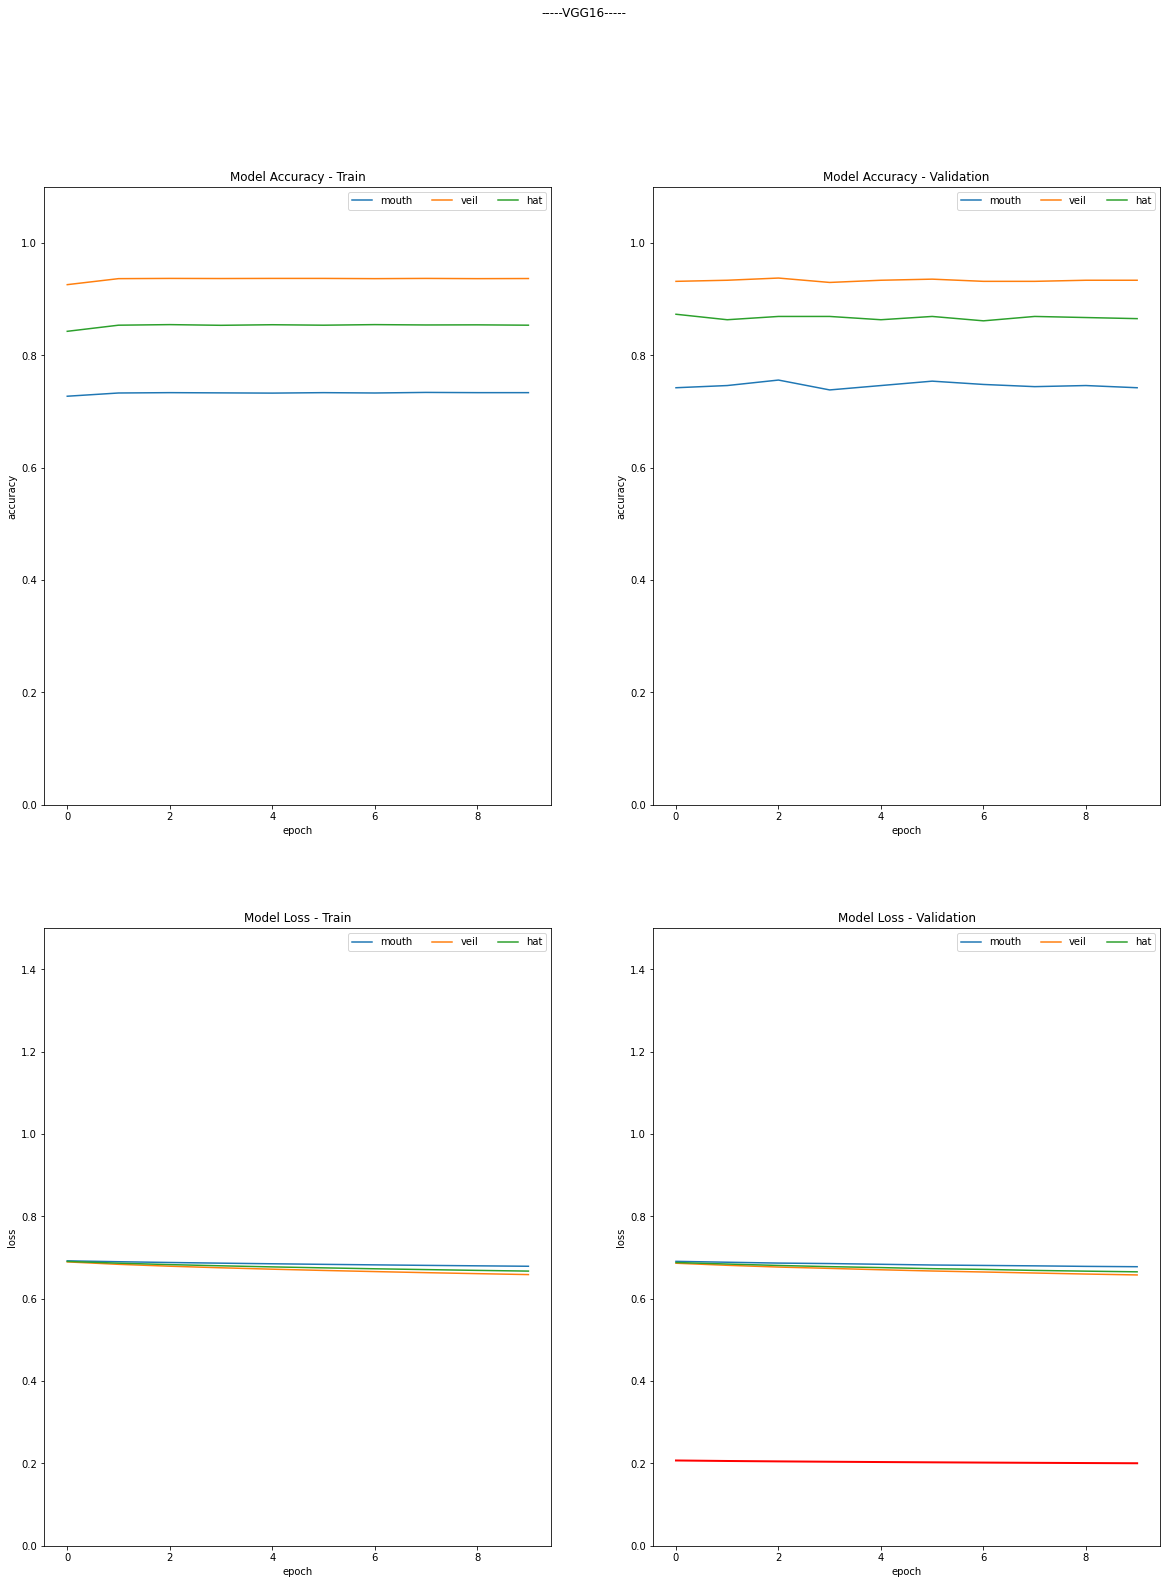

In [11]:
runner.draw_training_history()

# Load Best Model

In [12]:
runner.load_best_model()

..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [13]:
runner.save_model()

Not saving model!


# Test Trained Model

Testing Trained Model
Predicting labels....
Prediction finished!
Requisite: MOUTH
[1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1.]
[0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147 0.5165147
 0.5165147]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00    

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


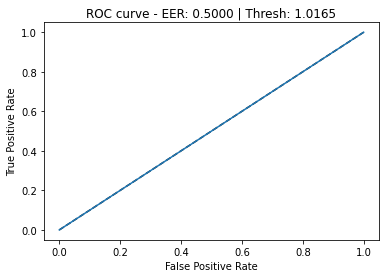

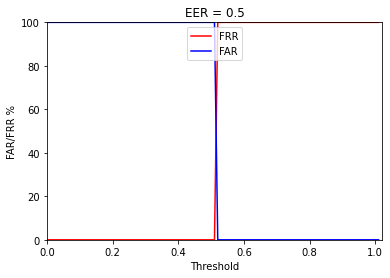

Requisite: ICAO_REQ.MOUTH - EER: 50.0% - Best Threshold: 1.016514778137207
Confusion matrix ----------------------------------------
TP: 222 | TN: 0 | FP: 66 | FN: 0
Requisite: VEIL
[1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1.]
[0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234 0.5209234
 0.5209234]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report ------------------------------

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


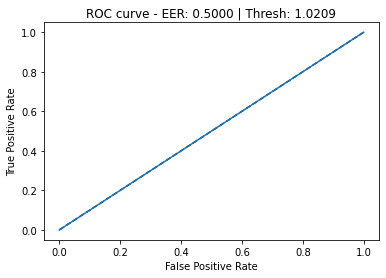

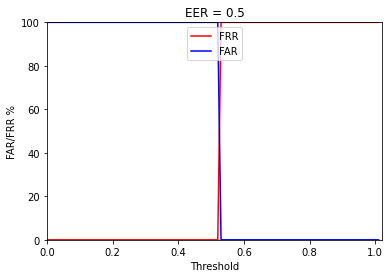

Requisite: ICAO_REQ.VEIL - EER: 50.0% - Best Threshold: 1.020923376083374
Confusion matrix ----------------------------------------
TP: 271 | TN: 0 | FP: 17 | FN: 0
Requisite: HAT
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608 0.519608
 0.519608 0.519608]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification report -----------------------------------
               precision    recall  f1-score   

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


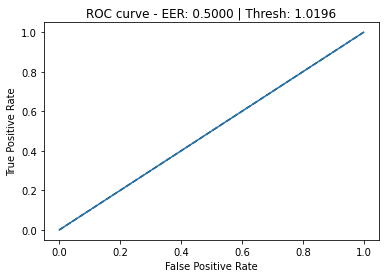

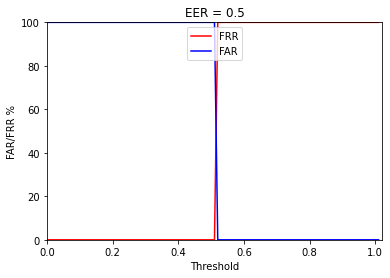

Requisite: ICAO_REQ.HAT - EER: 50.0% - Best Threshold: 1.0196080207824707
Confusion matrix ----------------------------------------
TP: 238 | TN: 0 | FP: 50 | FN: 0


In [17]:
runner.test_model()

# Evaluate Model

In [18]:
runner.evaluate_model()

Evaluating model
Loss:  0.2001
Accuracy:  0.6758


# Vizualize Model Classification

# Finishing Experiment Manager

In [20]:
runner.finish_experiment()

Not using Neptune
